In [23]:
# import nessessory library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Collecting Data


**What subject is data about?**<br><br>
In today's modern life, owning a car has become more than just a dream; it's a necessity and a symbol of independence for many people. Cars offer convenience, freedom, and the ability to travel without restrictions, making them a highly desirable asset for individuals and families alike. Recognizing this growing trend and the increasing demand for cars, we are committed to providing comprehensive and up-to-date car information to assist you in making the best choice. Whether you're looking for a reliable family vehicle, a fuel-efficient model, or a car that matches your lifestyle and personality, our insights and recommendations will guide you. With our help, you can confidently select the car that suits your needs, preferences. Let us be your trusted partner on your journey to owning the perfect vehicle!

**What is the source of data** <br><br>
Data is getted on Kaggle with [*Link of Data*](https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset?resource=download)

**Do authors of this data allow you to use like this? You can check the data license** <br><br>
It's the public domain so you can use that. You can check license in part **License** of [*Link of Data*](https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset?resource=download) and [*Public Domain*](https://creativecommons.org/publicdomain/zero/1.0/)

**How did authors collect data?** <br><br>
Authors is not refer to collecting data. You can check in part **Provenance** in [*Link of Data*](https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset?resource=download)

# Exploring Data

### Read data


In [24]:
data_path = './Data/CarInformation.csv'
df = pd.read_csv(data_path)

### How many rows and how many columns?

In [25]:
row, col = df.shape
print("Number of Row: ", row)
print("Number of Column: ", col)

Number of Row:  398
Number of Column:  9


So, the data set have **398** rows and **9** columns. 

### What is the meaning of each row?

In [26]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


Each row is the information of a car. It look good, hasn't different row. 

### Are there duplicated rows?

In [27]:
df[df.duplicated(keep=False)]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin


Data set hasn't duplicated row.

### What is the meaning of each column?

In [28]:
list(df.columns.values)

['name',
 'mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin']

| Column                  | Description                                                                 |
|-------------------------|-----------------------------------------------------------------------------|
| name                   | Unique identifier for each car.                |
| mpg      | Fuel efficiency measured in miles per gallon. 1 Gallon = 3,785411784 litres                      |
| cylinders                   | Number of cylinders in the engine.                                              |
| displacement        | Engine displacement, indicating its size or capacity.                               |
| horsepower           | Power output of the engine.                                              |
| weight       | Weight of the car.                 |
| acceleration | Capability to increase speed, measured in seconds.                                               |
| model_year | Year of manufacture for the car model.                                              |
| origin| Country or region of origin for each car.                   |


### What is the current data type of each column? Are there columns having inappropriate data types?

In [29]:
df.dtypes

name             object
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

Each row have correct type. However model_year have value: 70, 80 ... So we format this value of column

In [30]:
print(df['model_year'].max())

82


We see max of model_year is 82(mean 1982). To fast, we can add 1900 into column

In [31]:
df['model_year'] = df['model_year'] + 1900
df['model_year']

0      1970
1      1970
2      1970
3      1970
4      1970
       ... 
393    1982
394    1982
395    1982
396    1982
397    1982
Name: model_year, Length: 398, dtype: int64

### With each numerical column, how are values distributed?

In [32]:
def calculate_value_distributed(df):
    infor = pd.DataFrame()
    for col in df.select_dtypes(include=[np.number]).columns:
        missing_val = df[col].isna().sum()
        missing_per = missing_val / len(df[col]) * 100
        min_val = df[col].min()
        max_val = df[col].max()
        mean_val = df[col].mean()
        median_val = df[col].median()
        lower_percentile = np.percentile(df[col].dropna(), 25) #column horsepower has NaN
        upper_percentile = np.percentile(df[col].dropna(), 75) #column horsepower has NaN
        col_info = pd.Series({
            'num_missing': missing_val,
            'missing_percentage': missing_per,
            'min': min_val,
            'lower_quartile': lower_percentile,
            'median': median_val,
            'mean': mean_val,
            'upper_quartile': upper_percentile,
            'max': max_val
        })
        infor[col] = col_info

    return infor

infor = calculate_value_distributed(df)
infor


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
num_missing,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.00000
missing_percentage,0.000000,0.000000,0.000000,1.507538,0.000000,0.00000,0.00000
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.00000,1970.00000
lower_quartile,17.500000,4.000000,104.250000,75.000000,2223.750000,13.82500,1973.00000
median,23.000000,4.000000,148.500000,93.500000,2803.500000,15.50000,1976.00000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.56809,1976.01005
upper_quartile,29.000000,8.000000,262.000000,126.000000,3608.000000,17.17500,1979.00000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.80000,1982.00000


In [33]:
df = df.dropna()

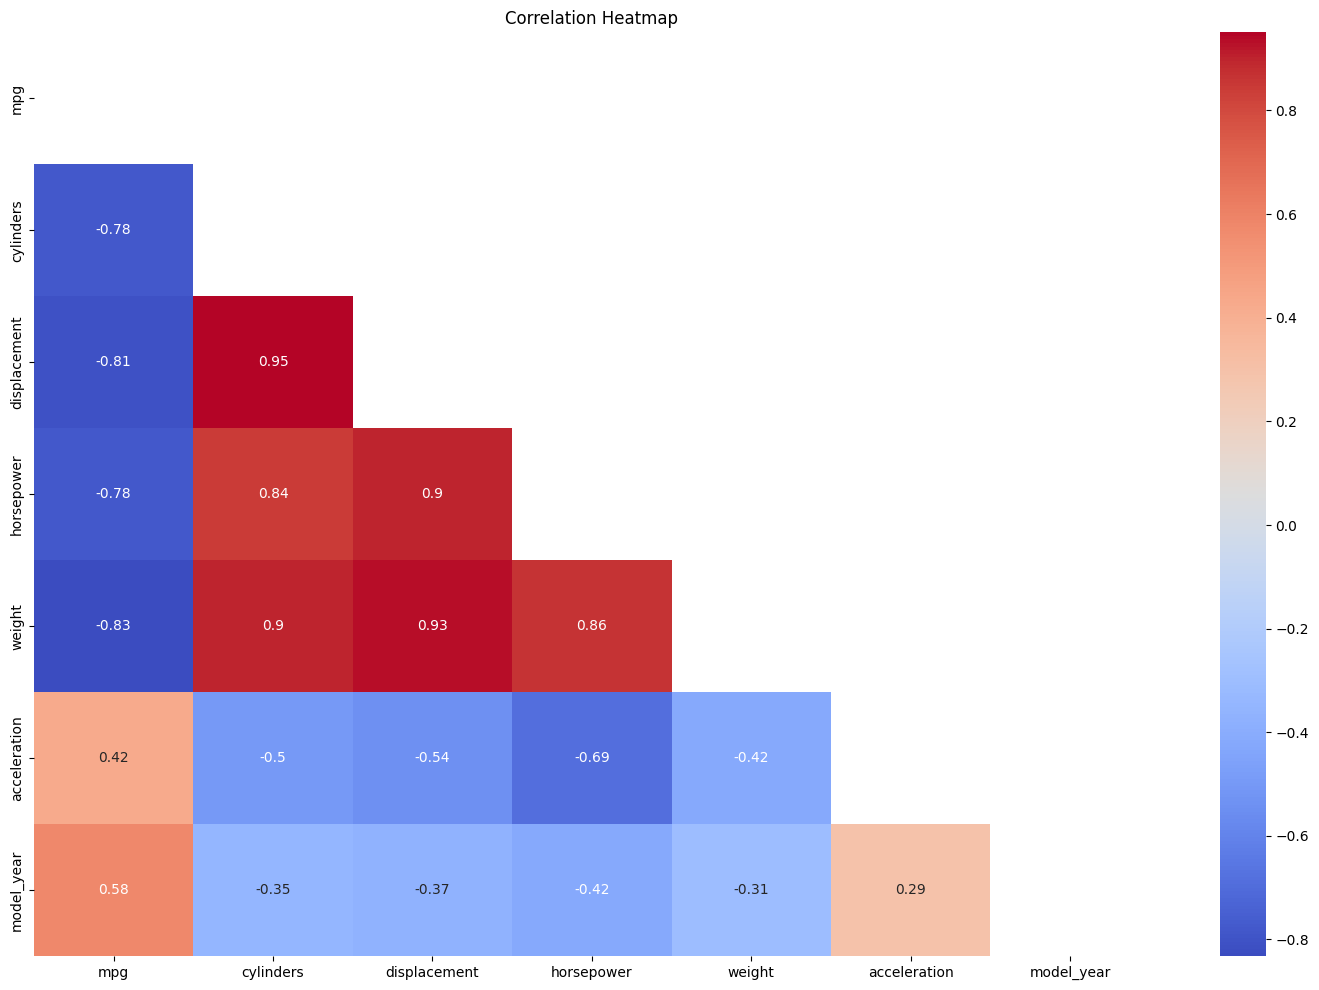

In [34]:
df_corr = df.select_dtypes(include=np.number).corr()
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(18,12))
sns.heatmap(df_corr, cmap="coolwarm", annot=True, mask=mask)
plt.title("Correlation Heatmap");

## Asking meaningful question

Xu hướng tốc độ của từng năm như thế nào ?

In [35]:
data_df = df[['acceleration', 'model_year']]
data_df.groupby('model_year').mean()
df['model_year'].max()

1982

Thị trường nào sản xuất nhiều ô tô nhất ?

In [36]:
df.groupby('origin').size()

data = df[df['origin'] == 'usa']
data

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970,usa
...,...,...,...,...,...,...,...,...,...
392,chevrolet camaro,27.0,4,151.0,90.0,2950,17.3,1982,usa
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982,usa
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982,usa


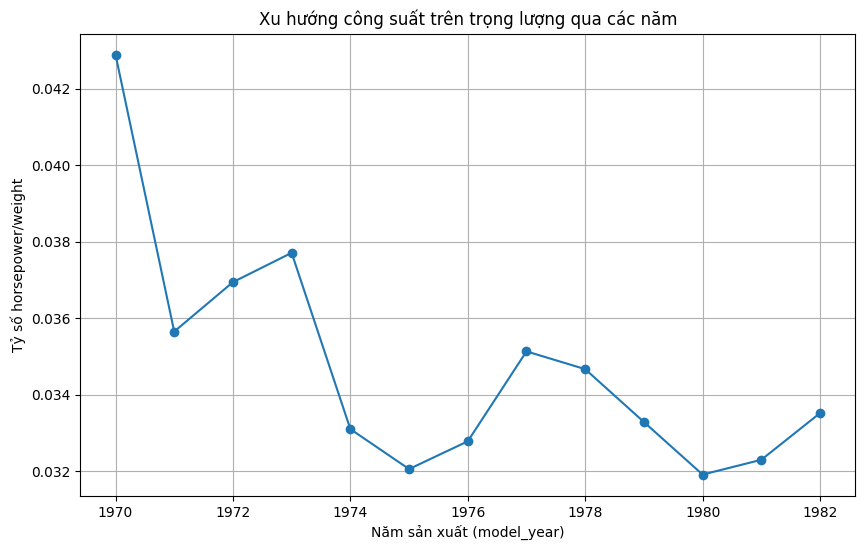

In [37]:
# 1. Xu hướng phát triển động cơ và hiệu suất theo thời gian

import matplotlib.pyplot as plt

df['hp_to_weight'] = df['horsepower'] / df['weight']
avg_hp_to_weight = df.groupby('model_year')['hp_to_weight'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_hp_to_weight, marker='o')
plt.title('Xu hướng công suất trên trọng lượng qua các năm')
plt.xlabel('Năm sản xuất (model_year)')
plt.ylabel('Tỷ số horsepower/weight')
plt.grid(True)
plt.show()


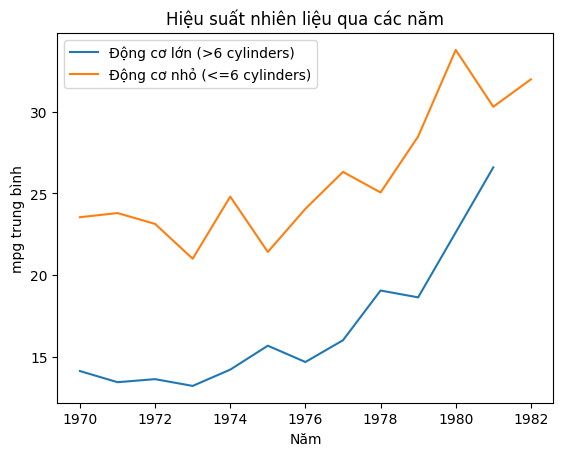

In [38]:
# cải thiện mpg qua các năm
# Tính mpg trung bình cho các động cơ lớn (cylinders > 6) và nhỏ (cylinders <= 6) theo từng năm
large_engine_mpg = df[df['cylinders'] > 6].groupby('model_year')['mpg'].mean()
small_engine_mpg = df[df['cylinders'] <= 6].groupby('model_year')['mpg'].mean()

# So sánh tốc độ cải thiện
plt.plot(large_engine_mpg.index, large_engine_mpg.values, label="Động cơ lớn (>6 cylinders)")
plt.plot(small_engine_mpg.index, small_engine_mpg.values, label="Động cơ nhỏ (<=6 cylinders)")
plt.title("Hiệu suất nhiên liệu qua các năm")
plt.xlabel("Năm")
plt.ylabel("mpg trung bình")
plt.legend()
plt.show()


xe lý tưởng nhất

In [39]:
correlation_matrix = df[['weight', 'acceleration', 'mpg', 'horsepower']].corr()
print("Hệ số tương quan:")
print(correlation_matrix)

mpg = df['mpg']
mpg_norm = (mpg - mpg.min()) / (mpg.max() - mpg.min())

weight = df['weight']
weight_norm = (weight - weight.min()) / (weight.max() - weight.min())

acceleration = df['acceleration']
acceleration_norm = (acceleration - acceleration.min()) / (acceleration.max() - acceleration.min())

horsepower = df['horsepower']
horsepower_norm = (horsepower - horsepower.min()) / (horsepower.max() - horsepower.min())

score = mpg_norm - weight_norm + acceleration_norm - horsepower_norm
score.sort_values(ascending=False)
df.loc[score.nlargest(10).index].reset_index(drop = True)

Hệ số tương quan:
                weight  acceleration       mpg  horsepower
weight        1.000000     -0.416839 -0.832244    0.864538
acceleration -0.416839      1.000000  0.423329   -0.689196
mpg          -0.832244      0.423329  1.000000   -0.778427
horsepower    0.864538     -0.689196 -0.778427    1.000000


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,hp_to_weight
0,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982,europe,0.024413
1,vw dasher (diesel),43.4,4,90.0,48.0,2335,23.7,1980,europe,0.020557
2,vw rabbit c (diesel),44.3,4,90.0,48.0,2085,21.7,1980,europe,0.023022
3,volkswagen rabbit custom diesel,43.1,4,90.0,48.0,1985,21.5,1978,europe,0.024181
4,mazda glc,46.6,4,86.0,65.0,2110,17.9,1980,japan,0.030806
5,datsun 210,40.8,4,85.0,65.0,2110,19.2,1980,japan,0.030806
6,toyota corolla tercel,38.1,4,89.0,60.0,1968,18.8,1980,japan,0.030488
7,chevrolet chevette,29.0,4,85.0,52.0,2035,22.2,1976,usa,0.025553
8,toyota starlet,39.1,4,79.0,58.0,1755,16.9,1981,japan,0.033048
9,renault 5 gtl,36.0,4,79.0,58.0,1825,18.6,1977,europe,0.031781


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Giả định df là DataFrame của bạn đã được load từ dữ liệu
# Lấy các cột cần thiết
data = df[['model_year', 'weight', 'acceleration']]

# Làm tròn trọng lượng để dễ nhóm (ví dụ: làm tròn đến bội số của 100)
# data['weight_group'] = (data['weight'] // 100) * 100

# Tính giá trị trung bình của gia tốc theo model_year và weight_group
acceleration_summary = data.groupby(['weight','model_year'])['acceleration'].mean().reset_index()

acceleration_summary[acceleration_summary['model_year'] == 1982]

# Trực quan hóa dữ liệu
# plt.figure(figsize=(12, 8))
# years = sorted(data['model_year'].unique())

# for year in years:
#     year_data = acceleration_summary[acceleration_summary['model_year'] == year]
#     plt.plot(year_data['weight_group'], year_data['acceleration'], marker='o', label=f"Year {year}")

# plt.title("Acceleration vs Weight Group by Model Year")
# plt.xlabel("Weight Group (Rounded to Nearest 100)")
# plt.ylabel("Mean Acceleration")
# plt.legend(title="Model Year")
# plt.grid(True);
# plt.show();


,weight,model_year,acceleration
27,1965,1982,15.35
29,1970,1982,17.60
32,1980,1982,15.30
38,1995,1982,16.20
43,2025,1982,18.20
62,2125,1982,16.00
67,2130,1982,24.60
76,2160,1982,14.50
86,2205,1982,14.50
97,2245,1982,16.90


In [41]:
import pandas as pd

# Lọc các cột cần thiết
data = df[['origin', 'model_year', 'mpg']]

# Tính trung bình mpg theo origin và model_year
mpg_by_origin_year = data.groupby(['origin', 'model_year'])['mpg'].mean().reset_index()

# Tìm năm đầu tiên và năm cuối cùng của mỗi origin
mpg_first_year = mpg_by_origin_year.groupby('origin').first().reset_index()
mpg_last_year = mpg_by_origin_year.groupby('origin').last().reset_index()

# Tính mức độ cải tiến mpg
mpg_improvement = mpg_last_year[['origin', 'mpg']].copy()
mpg_improvement['mpg_start'] = mpg_first_year['mpg']
mpg_improvement['mpg_change'] = mpg_improvement['mpg'] - mpg_improvement['mpg_start']

# Sắp xếp theo mức độ cải tiến
mpg_improvement = mpg_improvement.sort_values(by='mpg_change', ascending=False)

print("Mức độ cải tiến mpg của từng origin:")
print(mpg_improvement)

# Origin cải tiến nhiều nhất
most_improved_origin = mpg_improvement.iloc[0]
print("\nOrigin cải tiến nhiều nhất:")
print(f"Origin: {most_improved_origin['origin']}, Mức cải tiến: {most_improved_origin['mpg_change']:.2f} mpg")


Mức độ cải tiến mpg của từng origin:
   origin        mpg  mpg_start  mpg_change
0  europe  40.000000  25.200000   14.800000
2     usa  29.789474  15.272727   14.516746
1   japan  34.888889  25.500000    9.388889

Origin cải tiến nhiều nhất:
Origin: europe, Mức cải tiến: 14.80 mpg


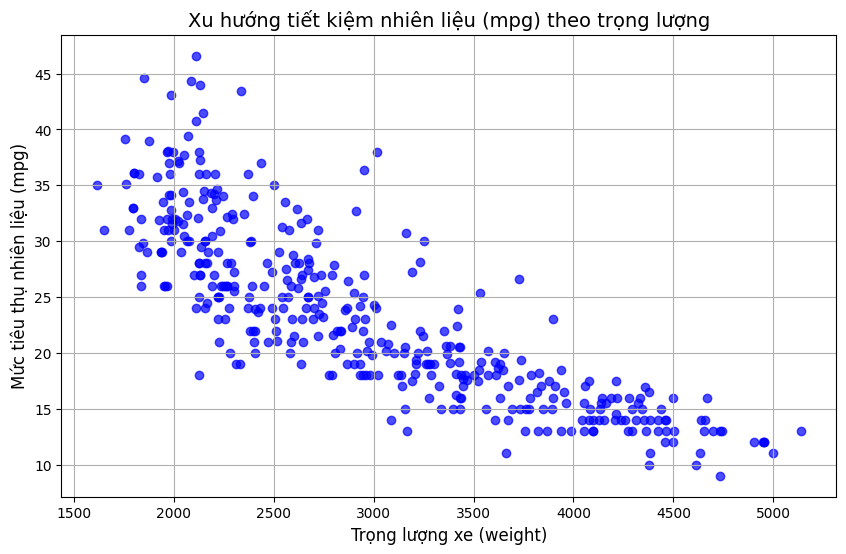

In [46]:
import pandas as pd
import matplotlib.pyplot as plt



# Vẽ biểu đồ xu hướng mpg theo trọng lượng
plt.figure(figsize=(10, 6))
plt.scatter(df['weight'], df['mpg'], color='blue', alpha=0.7)
plt.title('Xu hướng tiết kiệm nhiên liệu (mpg) theo trọng lượng', fontsize=14)
plt.xlabel('Trọng lượng xe (weight)', fontsize=12)
plt.ylabel('Mức tiêu thụ nhiên liệu (mpg)', fontsize=12)
plt.grid(True)
plt.show()




Tốc độ trung bình theo năm sản xuất:
    model_year  acceleration
0         1970     12.948276
1         1971     15.000000
2         1972     15.125000
3         1973     14.312500
4         1974     16.173077
5         1975     16.050000
6         1976     15.941176
7         1977     15.435714
8         1978     15.805556
9         1979     15.813793
10        1980     17.018519
11        1981     16.325000
12        1982     16.510000


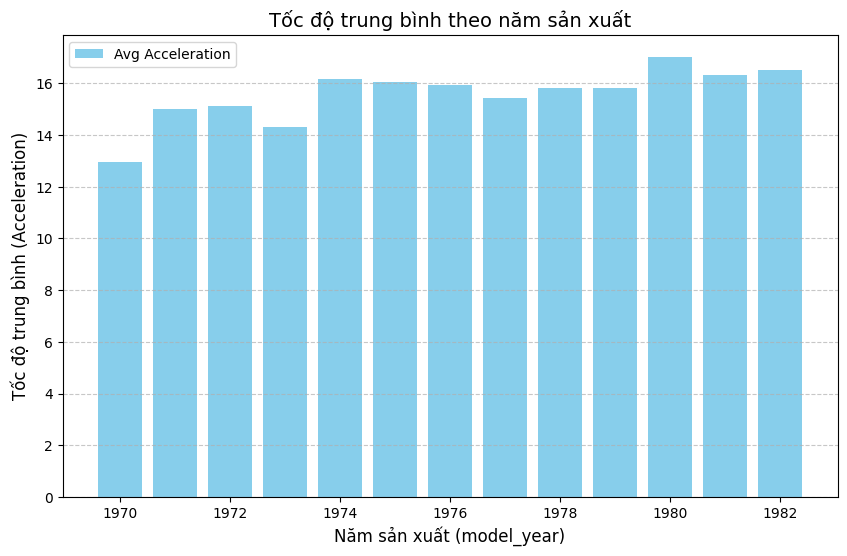

In [45]:
import pandas as pd
import matplotlib.pyplot as plt


# Tính tốc độ trung bình theo năm sản xuất
avg_acceleration = df.groupby('model_year')['acceleration'].mean().reset_index()

# Hiển thị kết quả trung bình
print("Tốc độ trung bình theo năm sản xuất:")
print(avg_acceleration)

# Vẽ biểu đồ tốc độ trung bình theo năm sản xuất
plt.figure(figsize=(10, 6))
plt.bar(avg_acceleration['model_year'], avg_acceleration['acceleration'], color='skyblue', label='Avg Acceleration')
plt.title('Tốc độ trung bình theo năm sản xuất', fontsize=14)
plt.xlabel('Năm sản xuất (model_year)', fontsize=12)
plt.ylabel('Tốc độ trung bình (Acceleration)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()




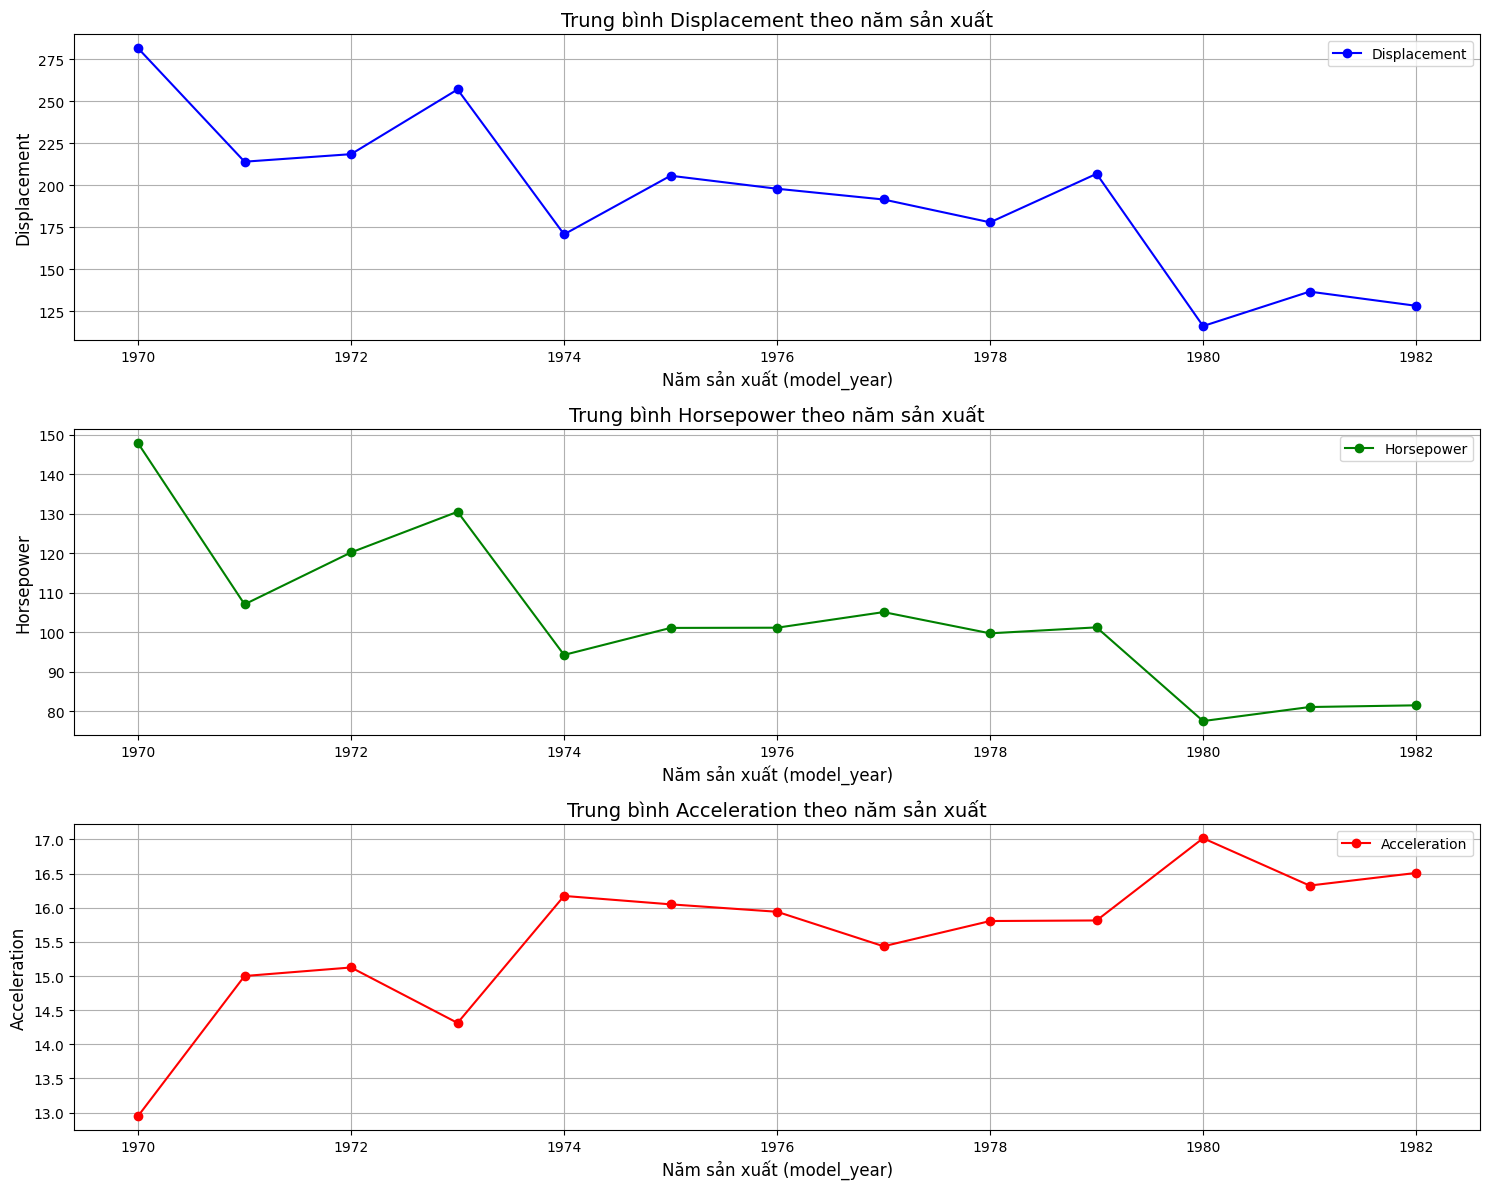

In [47]:
import pandas as pd
import matplotlib.pyplot as plt



# Tính trung bình displacement, horsepower và acceleration theo năm sản xuất
avg_data = df.groupby('model_year')[['displacement', 'horsepower', 'acceleration']].mean().reset_index()

# Tạo 3 biểu đồ
plt.figure(figsize=(15, 12))

# Biểu đồ displacement
plt.subplot(3, 1, 1)
plt.plot(avg_data['model_year'], avg_data['displacement'], marker='o', linestyle='-', color='blue', label='Displacement')
plt.title('Trung bình Displacement theo năm sản xuất', fontsize=14)
plt.xlabel('Năm sản xuất (model_year)', fontsize=12)
plt.ylabel('Displacement', fontsize=12)
plt.grid(True)
plt.legend()

# Biểu đồ horsepower
plt.subplot(3, 1, 2)
plt.plot(avg_data['model_year'], avg_data['horsepower'], marker='o', linestyle='-', color='green', label='Horsepower')
plt.title('Trung bình Horsepower theo năm sản xuất', fontsize=14)
plt.xlabel('Năm sản xuất (model_year)', fontsize=12)
plt.ylabel('Horsepower', fontsize=12)
plt.grid(True)
plt.legend()

# Biểu đồ acceleration
plt.subplot(3, 1, 3)
plt.plot(avg_data['model_year'], avg_data['acceleration'], marker='o', linestyle='-', color='red', label='Acceleration')
plt.title('Trung bình Acceleration theo năm sản xuất', fontsize=14)
plt.xlabel('Năm sản xuất (model_year)', fontsize=12)
plt.ylabel('Acceleration', fontsize=12)
plt.grid(True)
plt.legend()

# Hiển thị tất cả biểu đồ
plt.tight_layout()
plt.show()
